In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Alternative']
df = dfg[dfg['genre'] == 'Alternative']

In [42]:
df.describe()

Unnamed: 0   popularity  acousticness  danceability    duration_ms  \
count   9353.000000  9353.000000   9353.000000   9353.000000    9353.000000   
mean   23998.622260    54.659040      0.163175      0.541843  232554.443601   
std    11256.212446     7.848148      0.239840      0.147102   59700.999502   
min      242.000000     0.000000      0.000001      0.061700   16640.000000   
25%    20274.000000    50.000000      0.002230      0.444000  197000.000000   
50%    26035.000000    54.000000      0.035000      0.539000  224720.000000   
75%    28373.000000    59.000000      0.232000      0.641000  259333.000000   
max    53327.000000    86.000000      0.989000      0.971000  656493.000000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  9353.000000       9353.000000  9353.000000  9353.000000  9353.000000   
mean      0.706616          0.054340     0.195015    -6.526668     0.086489   
std       0.205312          0.166410     0.152907     2.751152     0.089542   
min       0.048400          0.000000     0.011900   -23.548000     0.022900   
25%       0.556000          0.000000     0.098700    -8.009000     0.035400   
50%       0.741000          0.000055     0.132000    -6.000000     0.050700   
75%       0.884000          0.004610     0.254000    -4.522000     0.093300   
max       0.998000          0.959000     0.981000     1.342000     0.949000   

       ...  duration_ms_zscore  energy_zscore  instrumentalness_zscore  \
count  ...         9353.000000    9353.000000              9353.000000   
mean   ...           -0.034752       0.482198                -0.283708   
std    ...            0.511671       0.787914                 0.569028   
min    ...           -1.885260      -2.043806                -0.469522   
25%    ...           -0.339473      -0.095814                -0.469522   
50%    ...           -0.101897       0.614151                -0.469335   
75%    ...            0.194755       1.162935                -0.453758   
max    ...            3.598640       1.600428                 2.809717   

       liveness_zscore  loudness_zscore  speechiness_zscore  tempo_zscore  \
count      9353.000000      9353.000000         9353.000000   9353.000000   
mean         -0.099624         0.476014           -0.193023      0.146783   
std           0.776271         0.463080            0.480726      0.975882   
min          -1.029249        -2.389057           -0.534416     -2.302981   
25%          -0.588588         0.226504           -0.467307     -0.665238   
50%          -0.419533         0.564664           -0.385165      0.084199   
75%           0.199829         0.813445           -0.156457      0.830445   
max           3.890618         1.800487            4.437566      3.137657   

       valence_zscore  lognorm_duration_zscore  Count_zscore  
count     9353.000000              9353.000000   9353.000000  
mean         0.017393                 0.064902      0.002401  
std          0.851550                 0.683154      0.537349  
min         -1.615896                -6.722534     -0.601109  
25%         -0.641334                -0.282419     -0.416570  
50%         -0.042266                 0.060647     -0.176111  
75%          0.611618                 0.433957      0.315992  
max          2.107330                 2.854280      1.943287  

[8 rows x 27 columns]

In [26]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']


print(df.corr())


AxesSubplot(0.125,0.125;0.62x0.755)


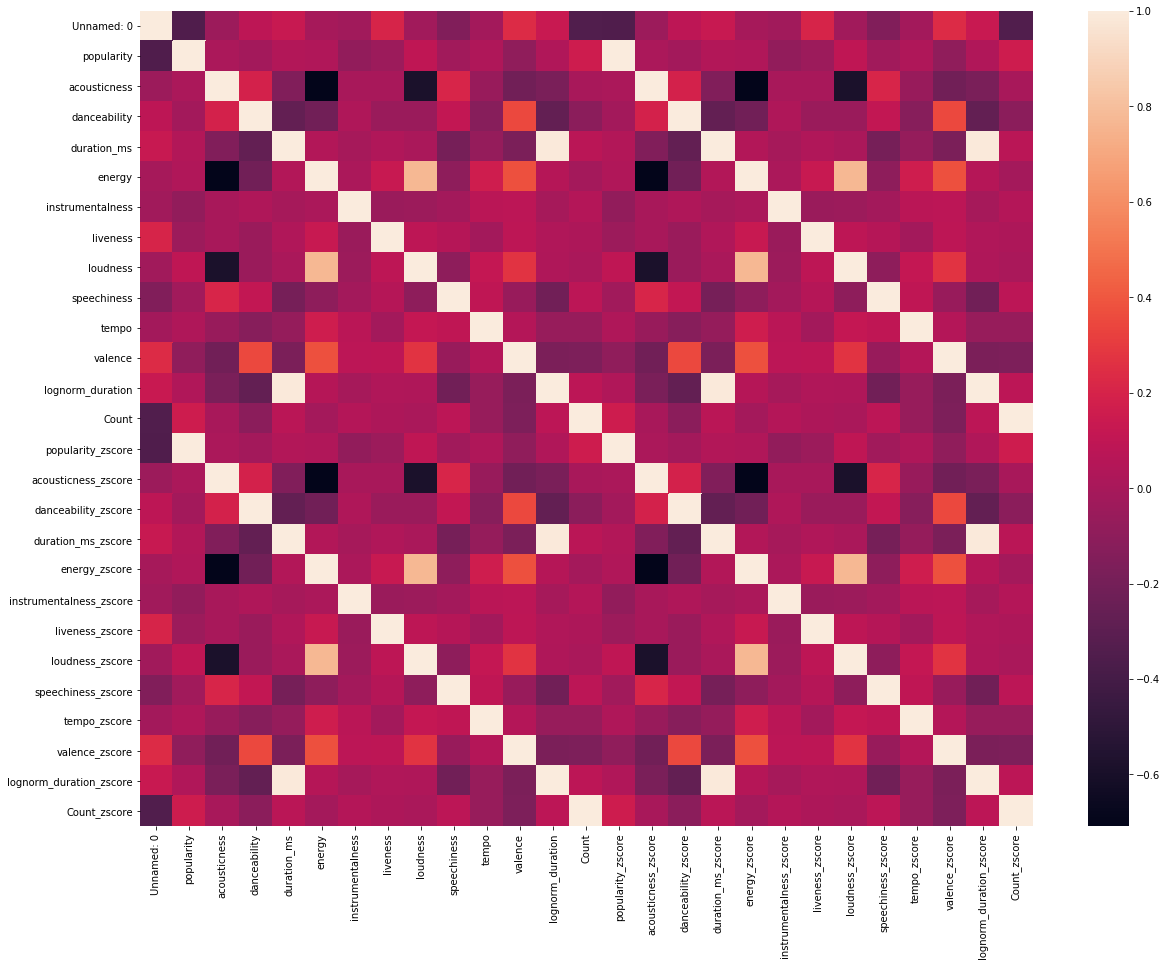

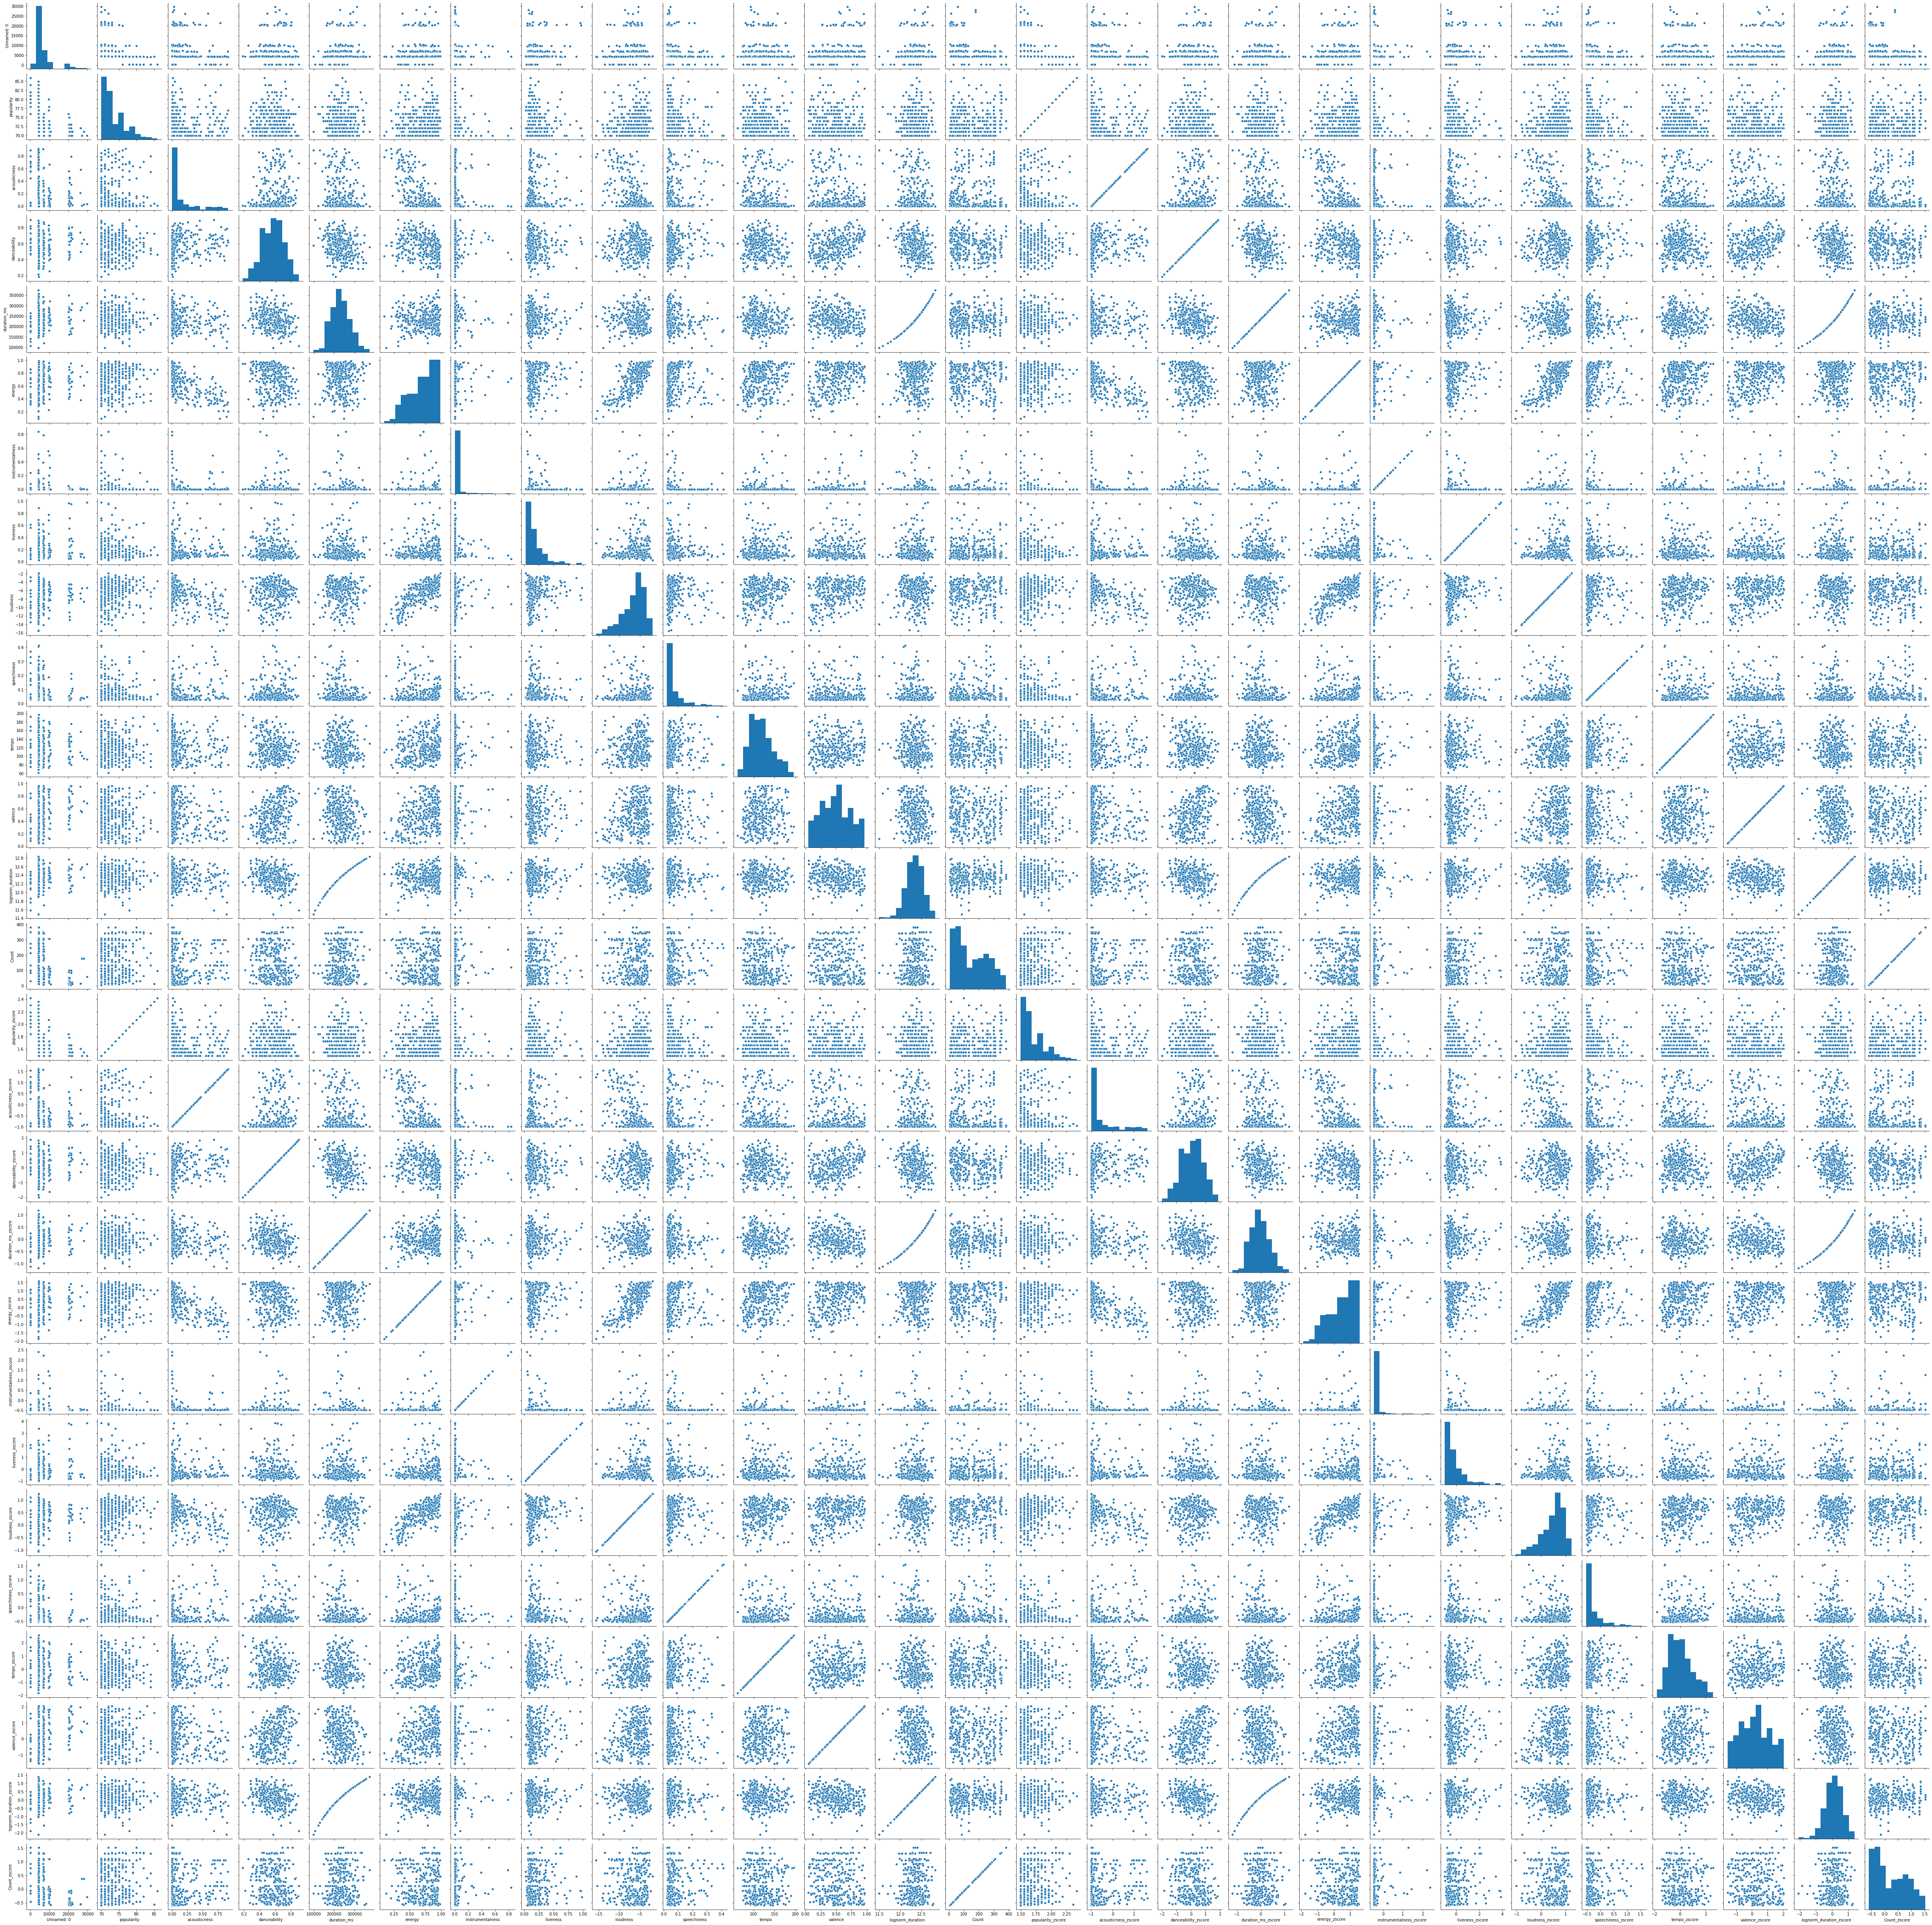

In [5]:
plt.subplots(figsize=(20,15))

m = sns.heatmap(pop.corr())
print(m)
n = sns.pairplot(data=pop)
print(n)

<ErrorbarContainer object of 3 artists>

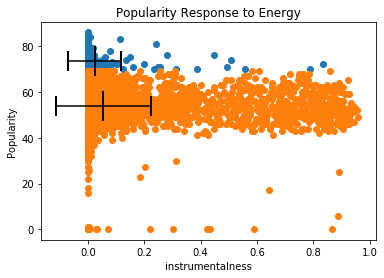

In [7]:
plt.scatter(pop.instrumentalness, pop.popularity)
plt.scatter(nonpop.instrumentalness, nonpop.popularity)
plt.xlabel("instrumentalness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Energy")

plt.errorbar(np.mean(pop.instrumentalness),np.mean(pop.popularity),xerr=np.std(pop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.instrumentalness),np.mean(nonpop.popularity),xerr=np.std(nonpop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

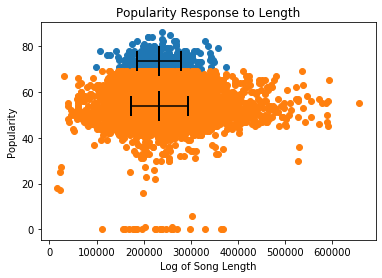

In [8]:
plt.scatter(pop.duration_ms, pop.popularity)
plt.scatter(nonpop.duration_ms, nonpop.popularity)
plt.xlabel("Log of Song Length")
plt.ylabel("Popularity")
plt.title("Popularity Response to Length")

plt.errorbar(np.mean(pop.duration_ms),np.mean(pop.popularity),xerr=np.std(pop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.duration_ms),np.mean(nonpop.popularity),xerr=np.std(nonpop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

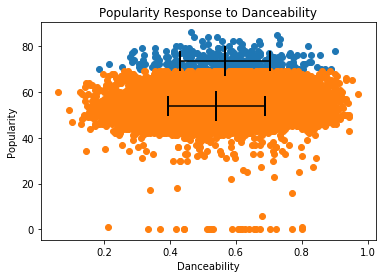

In [9]:
plt.scatter(pop.danceability, pop.popularity)
plt.scatter(nonpop.danceability, nonpop.popularity)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Popularity Response to Danceability")

plt.errorbar(np.mean(pop.danceability),np.mean(pop.popularity),xerr=np.std(pop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.danceability),np.mean(nonpop.popularity),xerr=np.std(nonpop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

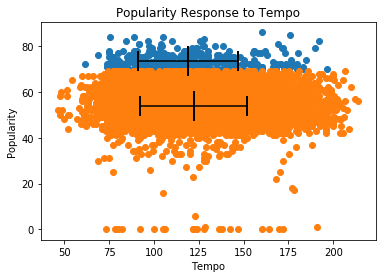

In [10]:
plt.scatter(pop.tempo, pop.popularity)
plt.scatter(nonpop.tempo, nonpop.popularity)
plt.xlabel("Tempo")
plt.ylabel("Popularity")
plt.title("Popularity Response to Tempo")

plt.errorbar(np.mean(pop.tempo),np.mean(pop.popularity),xerr=np.std(pop.tempo),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.tempo),np.mean(nonpop.popularity),xerr=np.std(nonpop.tempo),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

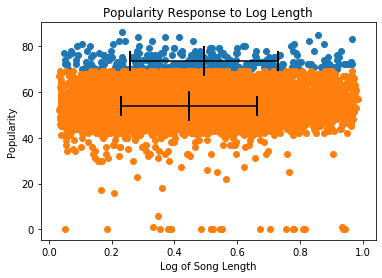

In [11]:
plt.scatter(pop.valence, pop.popularity)
plt.scatter(nonpop.valence, nonpop.popularity)
plt.xlabel("Log of Song Length")
plt.ylabel("Popularity")
plt.title("Popularity Response to Log Length")

plt.errorbar(np.mean(pop.valence),np.mean(pop.popularity),xerr=np.std(pop.valence),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.valence),np.mean(nonpop.popularity),xerr=np.std(nonpop.valence),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

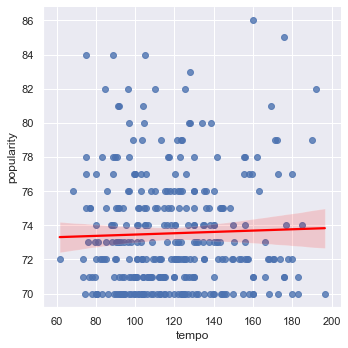

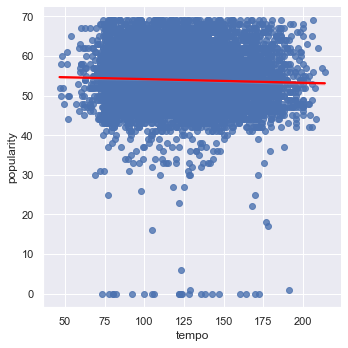

In [35]:
#print(df.corr())
n = sns.lmplot(x='tempo',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='tempo',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)

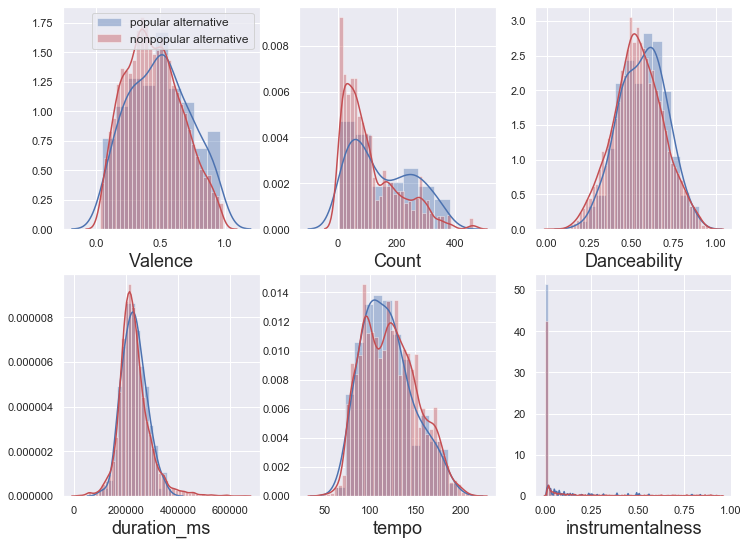

In [34]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(231)
sns.distplot(pop.valence, label='Popular Alternative')
sns.distplot(nonpop.valence, color='r', label='unpopular Alternative')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(nonpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(nonpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


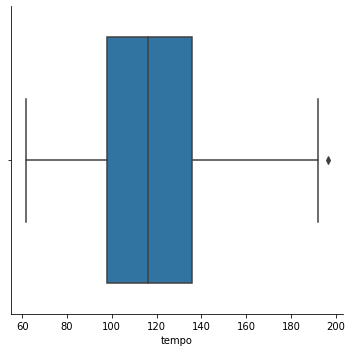

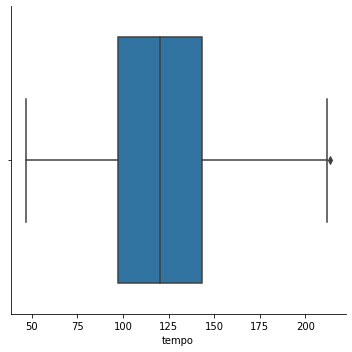

In [13]:
sns.factorplot(x='tempo', data=pop, kind='box')


sns.factorplot(x='tempo', data=nonpop, kind='box')
plt.show()

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


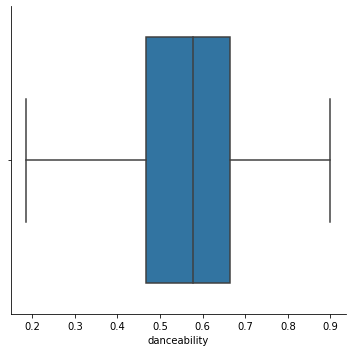

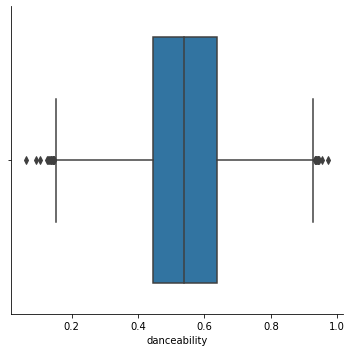

In [14]:
sns.factorplot(x='danceability', data=pop, kind='box')
sns.factorplot(x='danceability', data=nonpop, kind='box')
plt.show()

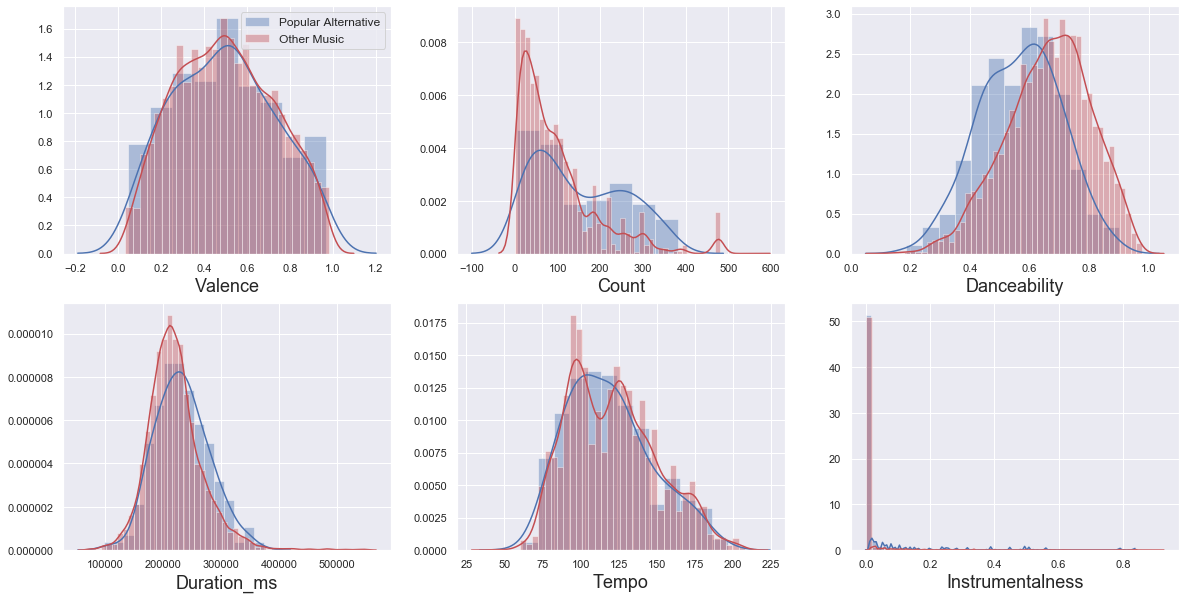

In [43]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(pop.valence, label='Popular Alternative')
sns.distplot(allpop.valence, color='r', label='Other Music')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(pop.danceability)
sns.distplot(allpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(pop.tempo)
sns.distplot(allpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)


plt.show()


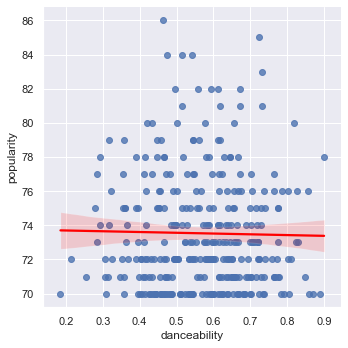

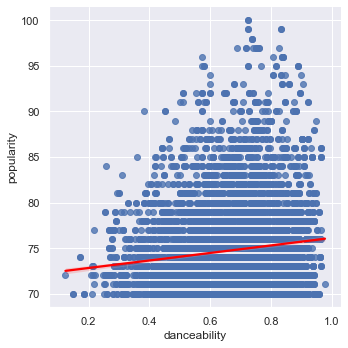

In [40]:
n = sns.lmplot(x='danceability',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)

Popular music has a positive correlation with Danceability, where popular Alternative music has a slighlty negative. 